In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(train)

60000

In [6]:
test.shape

(10000, 785)

In [7]:
len(test)

10000

In [8]:
X_train,y_train = train.drop(['label'], axis = 1), train['label']
X_test,y_test = test.drop(['label'], axis = 1), test['label']

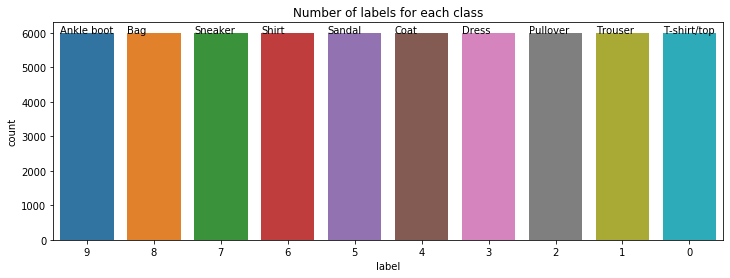

In [9]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(class_names[label], (p.get_x(), p.get_height()+0.1))
    plt.show()  
    
plot_label_per_class(train)

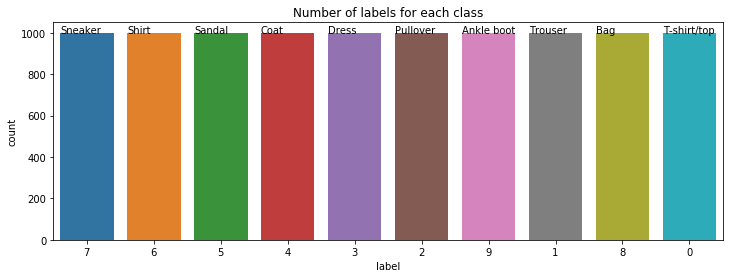

In [10]:
plot_label_per_class(test)

In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

In [12]:
def true_label(x):
    return class_names[x]

this represent a : Bag


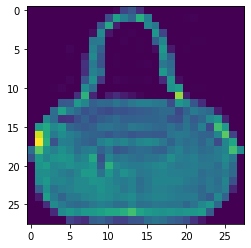

In [17]:
example = 20
g = plt.imshow(X_train.values.reshape(-1,28,28,1)[example][:,:,0])
print('this represent a : ' + true_label(y_train[example]))

PCA is a dimension reduction technic that allow to summarize information from data into few dimensions

In [18]:
# Taking only the first N rows to speed things up
X_PCA = X_train[:3000].values

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_PCA)
X_5d = pca.transform(X_PCA)

Target_name = y_train[:3000].apply(true_label)
Target = y_train[:3000]

Models:

Random forest

In [19]:
kfold = KFold(n_splits=3, shuffle=True)

X_train = X_train.reset_index(drop=True)

y_train.index = X_train.index
performance_accuracy = []

fold_count = 1

pipe = Pipeline([('pca',PCA(n_components=100)),
                 ('svm',RandomForestClassifier(n_jobs=-1, n_estimators=20))])

In [20]:
for (train_index, test_index) in kfold.split(X_train):
    X_kfold_train, y_kfold_train = X_train.iloc[train_index], y_train.loc[train_index]
    X_kfold_test, y_kfold_test = X_train.iloc[test_index], y_train.loc[test_index]
    pipe.fit(X_kfold_train, y_kfold_train)
    y_kfold_pred = pipe.predict(X_kfold_test)
    perf = accuracy_score(y_kfold_test, y_kfold_pred)
    performance_accuracy.append(perf)
    
    fold_count = fold_count + 1

In [21]:
print("Train accuracy:")
print(np.mean(performance_accuracy))

Train accuracy:
0.8456166666666666


In [22]:
pipe.fit(X_train, y_train)
y_predicted = pipe.predict(X_test)

In [23]:
print("Test accuracy:")
print(accuracy_score(y_test, y_predicted))

Test accuracy:
0.8559


Error Analysis

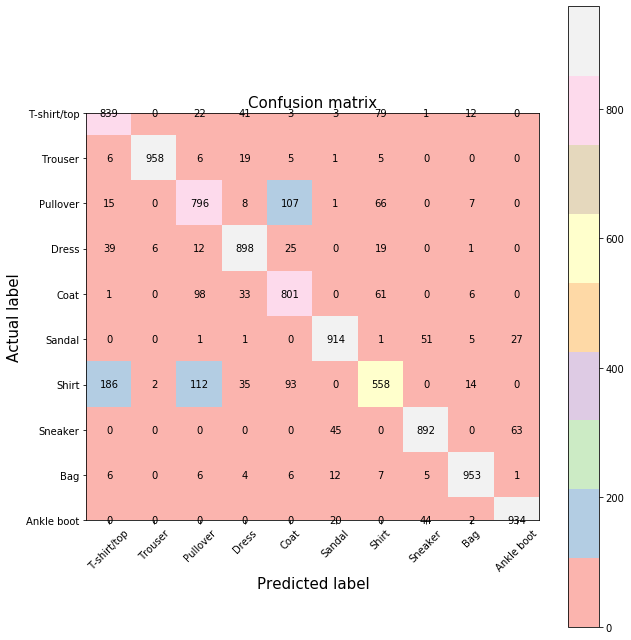

In [61]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], rotation=45, size = 10)
plt.yticks(tick_marks, ['T-shirt/top', 'Trouser', 'Pullover', 
                        'Dress', 'Coat', 'Sandal', 'Shirt', 
                        'Sneaker', 'Bag', 'Ankle boot'], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

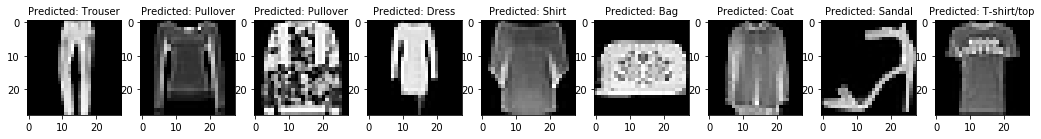

In [63]:
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(np.array(X_test)[1:10], y_predicted[1:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(np.array(image), (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: ' + str(true_label(label)) , fontsize = 10)

In [65]:
y_test.apply(true_label).loc[y_test!=y_predicted].value_counts()

Shirt          442
Pullover       204
Coat           199
T-shirt/top    161
Sneaker        108
Dress          102
Sandal          86
Ankle boot      66
Bag             47
Trouser         42
Name: label, dtype: int64